### 1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

**Решение**<br>
Числа на колесе рулетки, если считать от зеро по часовой стрелке, идут в следующем порядке: 0, 32, 15, 19, 4, 21, 2, 25, 17, 34, 6, 27, 13, 36, 11, 30, 8, 23, 10, 5, 24, 16, 33, 1, 20, 14, 31, 9, 22,18, 29, 7, 28, 12, 35, 3, 26. Ячейки, пронумерованные числами от 1 до 36, окрашены в чёрный и красный цвета. Номера расположены не по порядку, хотя цвета ячеек строго чередуются, начиная с 1 — красного цвета. Ячейка, обозначенная цифрой 0, окрашена в зелёный цвет и называется зеро. (с)

In [32]:
import numpy as np
import pandas as pd

def roulette_color(n):
    # n - number of throws
    # returns data of throw-color and number of reds, blacks and zeros
    throws = np.random.randint(0,38,n)
    colors=[]
    reds = 0
    blacks = 0
    zeros = 0
    for i in range(n):
        if throws[i] in (1,14,9,18,7,12,3,32,19,21,25,34,27,36,30,23,5,16):
            colors.append("красное")
            reds +=1
        elif throws[i] == 0:
            colors.append("зеро")
            zeros +=1
        else:
            colors.append("черное")
            blacks +=1
    dataset = pd.DataFrame({'Броски': throws, 'Цвета': colors})
    return dataset, reds, blacks, zeros

In [33]:
n=1000
data, reds, blacks, zeros = roulette_color(n)
display(data.head())
print("Доля красных: ", reds/n)
print("Доля черных: ", blacks/n)
print("Доля зеро: ", zeros/n)

,Броски,Цвета
0,13,черное
1,18,красное
2,7,красное
3,4,черное
4,7,красное


Доля красных:  0.473
Доля черных:  0.499
Доля зеро:  0.028


### 2.1 Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки

**Решение**<br>
Проверим умножение на примере:
* Подбрасываются две монеты. Какова вероятность, что за одновременно выпадет орел и решка?<br>
События независимы. Вероятность выпадения орла или решки = 1/2. Вероятность, что на двух подброшенных монетах одновременно выпадет орел и орел = 1/2 \* 1/2 = 1/4<br>
Это можно проверить так:<br>
При подбрасывании двух монет возможны следующие 4 исхода:
* Орел + орел
* Орел + решка
* Решка + решка
* Решка + орел<br>
Соответственно, вероятность одного из 4х исходов = 1/4

### 2.2 Сгенерируйте десять выборок случайных чисел х0, …, х9 и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
%matplotlib inline


x = np.empty([10, 100])
sum_x = np.empty([1, 100])
for i in range(10):
    x[i] = np.random.randint(0,10,100)

print(x[0])
sum_x=np.sum(x, axis=0)
print(sum_x)

[9. 5. 8. 0. 3. 8. 6. 7. 5. 7. 6. 8. 5. 8. 4. 0. 5. 3. 4. 7. 0. 1. 8. 2.
 2. 3. 9. 1. 9. 8. 5. 8. 6. 9. 5. 5. 8. 3. 2. 3. 6. 2. 2. 8. 8. 4. 1. 9.
 3. 8. 2. 1. 8. 3. 5. 0. 2. 2. 0. 0. 0. 3. 5. 6. 9. 9. 8. 7. 6. 3. 7. 6.
 2. 0. 2. 0. 3. 8. 2. 8. 2. 0. 4. 0. 5. 7. 3. 8. 8. 7. 7. 0. 8. 8. 6. 9.
 2. 6. 2. 4.]
[49. 37. 50. 42. 53. 55. 55. 40. 37. 40. 44. 49. 43. 56. 45. 42. 42. 60.
 37. 48. 39. 46. 47. 47. 48. 45. 45. 46. 48. 61. 35. 52. 38. 43. 37. 51.
 69. 46. 48. 28. 54. 36. 40. 42. 59. 50. 31. 59. 29. 45. 38. 45. 57. 32.
 30. 50. 47. 43. 46. 36. 50. 24. 45. 49. 60. 56. 49. 51. 42. 37. 35. 56.
 42. 42. 35. 36. 43. 55. 36. 52. 46. 44. 36. 43. 32. 48. 51. 52. 41. 46.
 54. 46. 48. 35. 52. 58. 39. 43. 46. 41.]


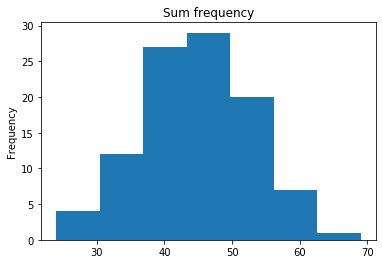

In [35]:
plt.hist(sum_x, bins=7)
plt.gca().set(title='Sum frequency', ylabel='Frequency');

### 3.1	Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты

In [36]:
import numpy as np
import math

def coin_drops(drops, success, n):
    """
    drops - число бросков
    success - число удачных исходов
    n - число наблюдений
    """
    k = 0
    x = np.empty([drops,n])

    for i in range(drops):
        x[i] = np.random.randint(0,2,n)
    
    sum_x=np.sum(x, axis=0)

    for i in range(0, n):
        if sum_x[i] == success:
            k = k + 1
    return k

n = 100000
success = 2
drops = 4

k = coin_drops(drops, success, n)
print(k,n,k/n)

37630 100000 0.3763


In [37]:
def coin_probability(success, drops):
    c = math.factorial(drops)/(math.factorial(success)*math.factorial(drops-success))
    return c / (2**drops)

p = coin_probability(success, drops)
print(p) 

0.375


**Сделаем 5 бросков и посчитаем вероятность выпадения 3х орлов. Число наблюдений - 100 000**

In [38]:
n = 100000
success = 3
drops = 5

k = coin_drops(drops, success, n)
print(k,n,k/n)

p = coin_probability(success, drops)
print(p) 

31171 100000 0.31171
0.3125


### 4. Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [39]:
import itertools

def premutations(n,k):
    for p in itertools.permutations(n,k):
        print("".join(str(x) for x in p))

def combinations(n,k):
    for p in itertools.combinations(n,k):
        print("".join(p))


def product(n,k):
    for p in itertools.product(n,repeat = k):
        print("".join(p))

n = "abc"
k = 2

In [40]:
print(premutations(n,k))

ab
ac
ba
bc
ca
cb
None


In [41]:
print(combinations(n,k))

ab
ac
bc
None


In [42]:
print(product(n,k))

aa
ab
ac
ba
bb
bc
ca
cb
cc
None


### 5. Дополните код расчетом коэффициента корреляции x и y по формуле

<img src="Lesson5_pic1.png">

Параметры а и b по формуле:
 0.3941454648675017 0.3163030480810451

Параметры а и b через функцию vstack:
 0.39414546486750207 0.31630304808104487

Коэффициент корреляции по формуле:
 0.477490983739864

Коэффициент корреляции через функцию corrcoef:
 [[1.         0.47749098]
 [0.47749098 1.        ]]


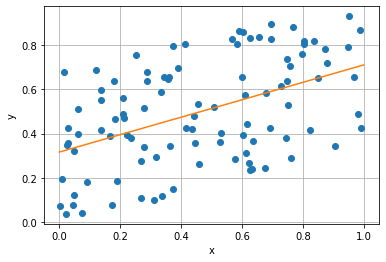

In [51]:
n = 100
r = 0.3
x = np.random.rand(n)
y = r*x + (1-r)*np.random.rand(n)

plt.plot(x,y, "o")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y)) / (np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x)) / n

A = np.vstack([x, np.ones(len(x))]).T
a1,b1 = np.linalg.lstsq(A,y, rcond=None)[0]
print("Параметры а и b по формуле:\n",a,b)
print("\nПараметры а и b через функцию vstack:\n",a1,b1)

c = np.sum((x - np.mean(x))*(y - np.mean(y)))/np.sqrt(np.sum((x - np.mean(x))**2) * np.sum((y - np.mean(y))**2))
c1 = np.corrcoef(x,y)
print("\nКоэффициент корреляции по формуле:\n",c)
print("\nКоэффициент корреляции через функцию corrcoef:\n",c1)

plt.plot([0,1],[b, a+b])
plt.show()